In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data/地市级党委书记数据库（2000-10）.csv")
print(data.head())

   省级政区代码 省级政区名称  地市级政区代码 地市级政区名称    年份 党委书记姓名  出生年份  出生月份  籍贯省份代码 籍贯省份名称  \
0  130000    河北省   130100    石家庄市  2000    陈来立   NaN   NaN     NaN    NaN   
1  130000    河北省   130100    石家庄市  2001    吴振华   NaN   NaN     NaN    NaN   
2  130000    河北省   130100    石家庄市  2002    吴振华   NaN   NaN     NaN    NaN   
3  130000    河北省   130100    石家庄市  2003    吴振华   NaN   NaN     NaN    NaN   
4  130000    河北省   130100    石家庄市  2004    吴振华   NaN   NaN     NaN    NaN   

   ...    民族  教育 是否是党校教育（是=1，否=0） 专业：人文 专业：社科  专业：理工  专业：农科  专业：医科  入党年份  工作年份  
0  ...   NaN  硕士              1.0   NaN   NaN    NaN    NaN    NaN   NaN   NaN  
1  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
2  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
3  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
4  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  

[5 rows x 23 columns]


In [2]:
print(data[['党委书记姓名','年份','教育']].head())

  党委书记姓名    年份  教育
0    陈来立  2000  硕士
1    吴振华  2001  本科
2    吴振华  2002  本科
3    吴振华  2003  本科
4    吴振华  2004  本科


In [3]:
filed = data.columns.tolist()

In [4]:
print(data.describe())

              省级政区代码        地市级政区代码           年份         出生年份         出生月份  \
count    3663.000000    3663.000000  3663.000000  2676.000000  2645.000000   
mean   403393.393393  404456.756757  2005.000000  1953.622571     6.790548   
std    148176.721620  148485.810327     3.162709     4.416316     3.614664   
min    130000.000000  130100.000000  2000.000000  1941.000000     1.000000   
25%    330000.000000  330100.000000  2002.000000  1951.000000     3.000000   
50%    420000.000000  420200.000000  2005.000000  1954.000000     7.000000   
75%    510000.000000  513400.000000  2008.000000  1956.000000    10.000000   
max    650000.000000  654300.000000  2010.000000  1966.000000    14.000000   

              籍贯省份代码         籍贯地市代码  是否是党校教育（是=1，否=0）        专业：人文  \
count    2624.000000    2615.000000       2493.000000  2370.000000   
mean   364428.353659  365742.332696          0.430405     0.275527   
std    126267.485520  125961.993399          0.576136     0.446874   
min    110000.000

In [5]:
print(data.describe(include=[np.object]))

       省级政区名称 地市级政区名称 党委书记姓名 籍贯省份名称 籍贯地市名称    性别    民族    教育
count    3663    3663   3021   2624   2615  2708  2517  2550
unique     27     333    901     29    240     2     2     7
top       广东省     盐城市    焉荣竹    山东省    威海市     男    汉族    硕士
freq      231      11     11    313     58  2633  2351  1381


In [6]:
data_gender = data['性别']
data_gender = data_gender[data_gender.notnull()]
count_a = len(data_gender)
count_m = len(data_gender[data_gender == '男'])
count_w = len(data_gender[data_gender == '女'])
print("总共数据:",count_a)
print("女性比例:%.2f%%" % (count_w/count_a*100))
print("男性比例:%.2f%%" % (count_m/count_a*100))

总共数据: 2708
女性比例:2.77%
男性比例:97.23%


In [7]:
convence_gender = data[['省级政区名称','性别']]

In [8]:
convence_gender = convence_gender[convence_gender['性别'].notnull()]

In [9]:
pt = pd.crosstab(convence_gender['省级政区名称'],convence_gender['性别'])
print(pt.head())

性别       女    男
省级政区名称         
云南省      2   73
内蒙古自治区   0   86
吉林省      4   72
四川省      8  155
宁夏回族自治区  0   49


In [10]:
pt['all'] = pt['女']+pt['男']
pt['女性比例'] = pt['女']/pt['all']
pt['男性比例'] = pt['男']/pt['all']
print(pt.head())

性别       女    男  all      女性比例      男性比例
省级政区名称                                  
云南省      2   73   75  0.026667  0.973333
内蒙古自治区   0   86   86  0.000000  1.000000
吉林省      4   72   76  0.052632  0.947368
四川省      8  155  163  0.049080  0.950920
宁夏回族自治区  0   49   49  0.000000  1.000000


In [11]:
pt2 = pt.sort_values(by = ['女性比例'],ascending=False)
print(pt2.head(10))

性别       女    男  all      女性比例      男性比例
省级政区名称                                  
辽宁省     13  121  134  0.097015  0.902985
陕西省      9   93  102  0.088235  0.911765
吉林省      4   72   76  0.052632  0.947368
山西省      6  112  118  0.050847  0.949153
四川省      8  155  163  0.049080  0.950920
安徽省      7  167  174  0.040230  0.959770
江西省      4  113  117  0.034188  0.965812
山东省      6  178  184  0.032609  0.967391
福建省      3   96   99  0.030303  0.969697
云南省      2   73   75  0.026667  0.973333


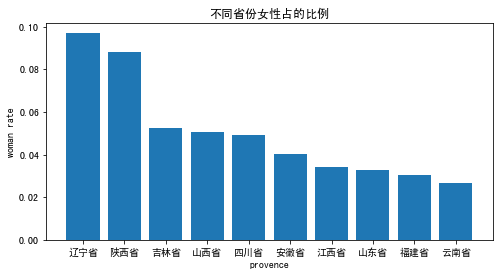

In [14]:
fig = plt.figure(figsize=(8,4))
plt.title('不同省份女性占的比例')
plt.xlabel('provence')
plt.ylabel('woman rate')
index = pt2.index[:10]
plt.bar(range(10),pt2['女性比例'][:10],tick_label= index)
plt.show()

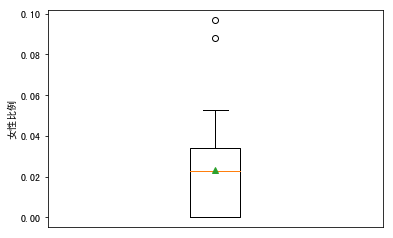

In [16]:
plt.boxplot(pt2['女性比例'],vert=True,showmeans=True)
plt.xticks([])
plt.ylabel('女性比例')
plt.show()

/home/plf/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
